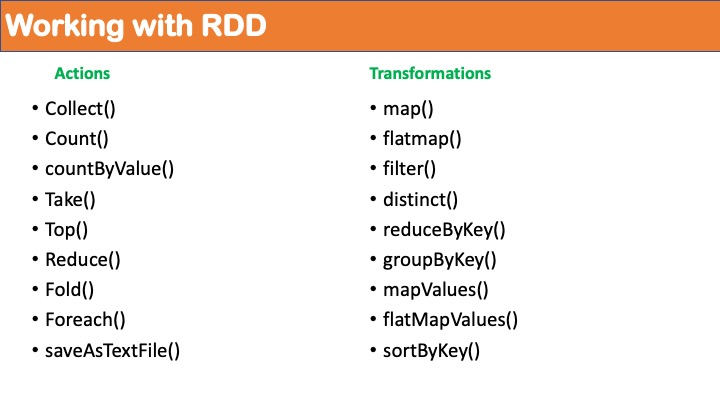

In [1]:
from IPython.display import Image
Image(filename='RDD_Actions_Transformations.jpg')

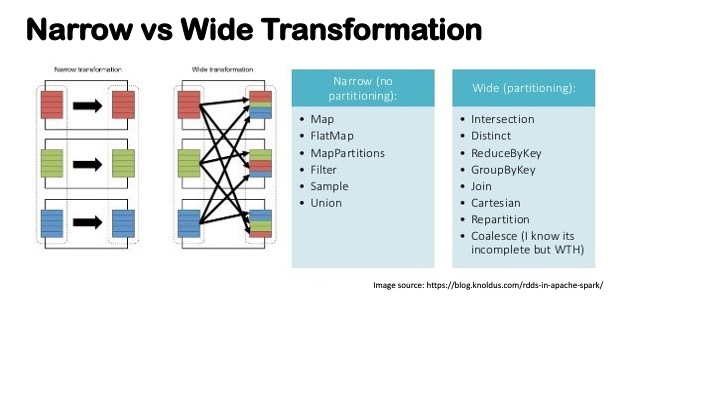

In [2]:
from IPython.display import Image
Image(filename='Narrow_wide.jpg')

In [3]:
from pyspark import SparkContext, SparkConf

In [4]:
conf = SparkConf().setAppName("Youtube").setMaster("local")
sc = SparkContext(conf=conf)

## NARROW TRANSFORMATION

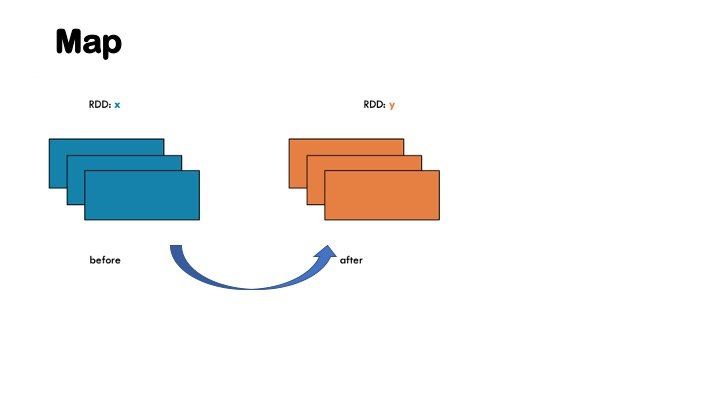

In [5]:
Image(filename='Map.jpg')

In [6]:
num = sc.parallelize([5,5,4,3,2,9,2])
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [7]:
num.map(lambda a : a*2).collect()

[10, 10, 8, 6, 4, 18, 4]

In [8]:
num.map(lambda a : pow(a,2)).collect()

[25, 25, 16, 9, 4, 81, 4]

In [9]:
names = sc.parallelize([ "Bills", "Mark","Brain","Mick"])

In [10]:
names.map(lambda a : "Mr. "+ a).collect()

['Mr. Bills', 'Mr. Mark', 'Mr. Brain', 'Mr. Mick']

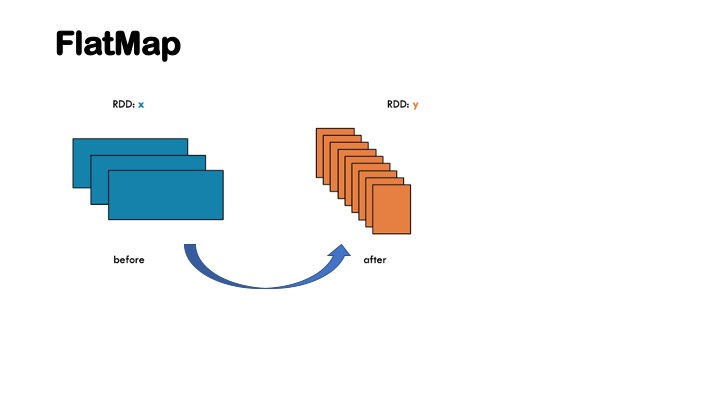

In [11]:
Image(filename='FlatMap.jpg')

In [12]:
rdd = sc.parallelize([ 2, 3,4])
rdd.collect()

[2, 3, 4]

In [13]:
a = range(1,3)
for i in a:
    print(i)

1
2


In [14]:
(rdd.flatMap(lambda x: range(1, x)).collect())

[1, 1, 2, 1, 2, 3]

In [16]:
a = sc.parallelize([1,2,3])

In [21]:
a.flatMap(lambda x: (x,x*10,57)).collect()

[1, 10, 57, 2, 20, 57, 3, 30, 57]

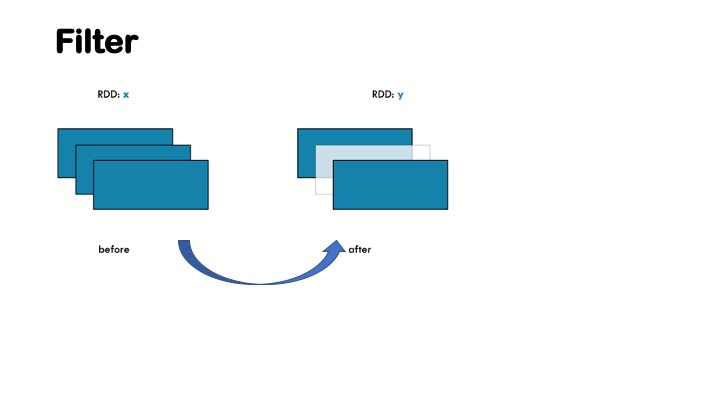

In [22]:
Image(filename='Filter.jpg')

In [23]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [24]:
num.filter(lambda x : x%2 == 0).collect()

[4, 2, 2]

In [25]:
names.collect()

['Bills', 'Mark', 'Brain', 'Mick']

In [26]:
names.filter(lambda x : "B" in x).collect()

['Bills', 'Brain']

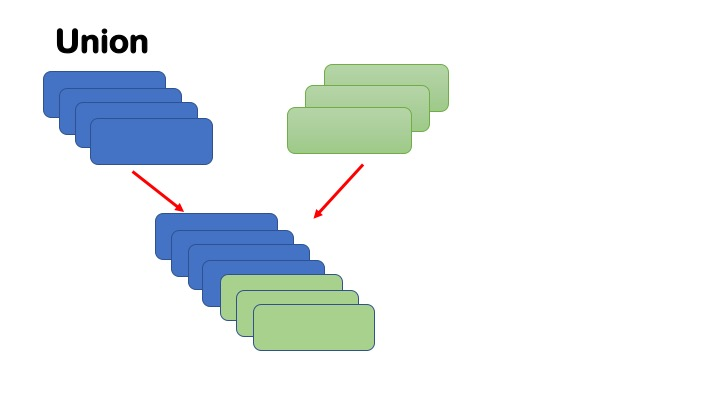

In [27]:
Image(filename='Union.jpg')

In [28]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [29]:
num2 = sc.parallelize([1,7,9,4,10,15])
num2.collect()

[1, 7, 9, 4, 10, 15]

In [31]:
num2.union(num).collect()

[1, 7, 9, 4, 10, 15, 5, 5, 4, 3, 2, 9, 2]

In [32]:
x = sc.parallelize([1,2,3], 2) 
y = sc.parallelize([3,4], 1) 

In [33]:
z = x.union(y)
z.collect()

[1, 2, 3, 3, 4]

In [ ]:
Image(filename='Sample.jpg')


In [ ]:
# sample: Return a random sample subset RDD of the input RDD
# API: (withReplacement: Boolean, fraction: Double, seed: Long = Utils.random.nextLong): RDD[T]
# Note This is not guaranteed to provide exactly the fraction specified of the total count of the given


In [34]:
parallel = sc.parallelize(range(1,10))
parallel.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
parallel.sample(True,.2,).collect()

[]

In [49]:
parallel.sample(True,.2,seed=19).collect() # result would be same 

[2, 4, 6, 9]

In [52]:
parallel.sample(False,.2).collect()

[8]

In [53]:
parallel.sample(True,.2).collect()

[5]

In [54]:
parallel.sample(False,.2,seed=23).collect()

[4, 5]

## Wide Transformation 

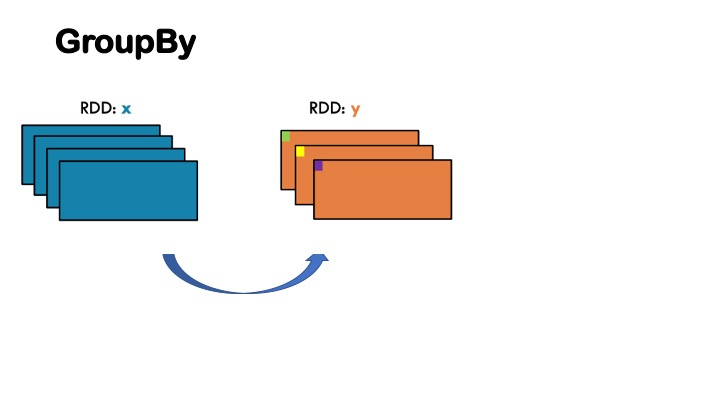

In [55]:
Image(filename='GroupBy.jpg')

In [67]:
names.collect()

['Bills', 'Mark', 'Brain', 'Mick']

In [63]:
names_gr = names.groupBy(lambda x : x[0]).collect()

In [68]:
names_gr

[('B', <pyspark.resultiterable.ResultIterable at 0x26200384588>),
 ('M', <pyspark.resultiterable.ResultIterable at 0x26200384548>)]

In [69]:
for (k,v) in names_gr:
    print(k,list(v) )

B ['Bills', 'Brain']
M ['Mark', 'Mick']


In [72]:
aa = sc.parallelize([1, 1, 2, 3, 5, 8])


In [76]:
result = aa.groupBy(lambda x: x % 2).collect()

In [77]:
result

[(1, <pyspark.resultiterable.ResultIterable at 0x262003fbdc8>),
 (0, <pyspark.resultiterable.ResultIterable at 0x262003fb7c8>)]

In [78]:
for (k,v) in result:
    print(k, list(v) )

1 [1, 1, 3, 5]
0 [2, 8]


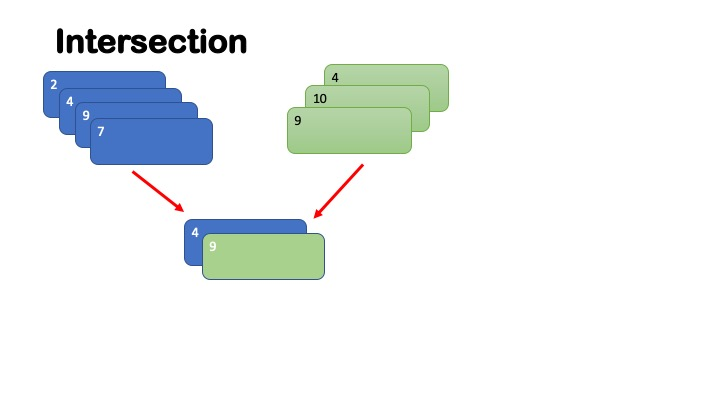

In [79]:
Image(filename='Intersection.jpg')

In [80]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [81]:
num2.collect()

[1, 7, 9, 4, 10, 15]

In [82]:
num.intersection(num2).collect()

[4, 9]

In [83]:
num2.intersection(num).collect()

[4, 9]

In [84]:
num.subtract(num2).collect()

[2, 2, 5, 5, 3]

In [85]:
num2.subtract(num).collect()

[10, 1, 7, 15]

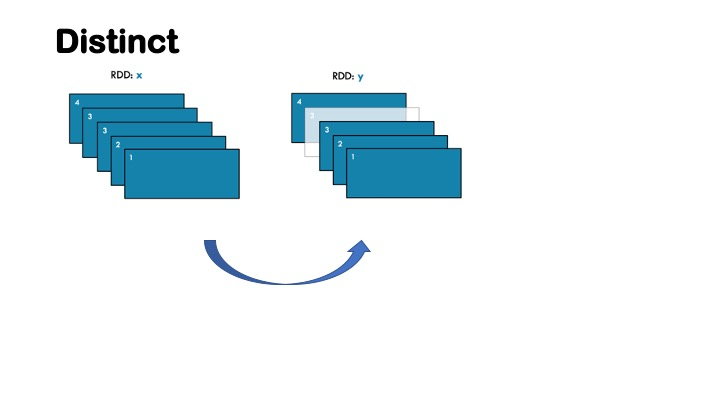

In [86]:
Image(filename='Distinct.jpg')

In [87]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [88]:
num.distinct().collect() # distincet

[5, 4, 3, 2, 9]

In [ ]:
#Join